In [11]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from scipy import stats
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, explained_variance_score
from sklearn.feature_selection import f_regression 
from math import sqrt

import warnings
warnings.filterwarnings('ignore')

1. Load the tips dataset from either pydataset or seaborn.

In [13]:
from pydataset import data
tips = data('tips')
tips.head()

,total_bill,tip,sex,smoker,day,time,size
1,16.99,1.01,Female,No,Sun,Dinner,2
2,10.34,1.66,Male,No,Sun,Dinner,3
3,21.01,3.50,Male,No,Sun,Dinner,3
4,23.68,3.31,Male,No,Sun,Dinner,2
5,24.59,3.61,Female,No,Sun,Dinner,4


In [14]:
df = tips
x = tips[['tip']]
y = tips['total_bill']

2. Fit a linear regression model (ordinary least squares) and compute yhat, predictions of tip using total_bill.

In [15]:
#baseline
df['yhat_baseline'] = y.mean()
df.head()

,total_bill,tip,sex,smoker,day,time,size,yhat_baseline
1,16.99,1.01,Female,No,Sun,Dinner,2,19.785943
2,10.34,1.66,Male,No,Sun,Dinner,3,19.785943
3,21.01,3.50,Male,No,Sun,Dinner,3,19.785943
4,23.68,3.31,Male,No,Sun,Dinner,2,19.785943
5,24.59,3.61,Female,No,Sun,Dinner,4,19.785943


In [16]:
# generate parameters, i.e. create model
model = LinearRegression().fit(x, y)

# compute predictions and add to original dataframe
df['yhat'] = model.predict(x)

df.head()

,total_bill,tip,sex,smoker,day,time,size,yhat_baseline,yhat
1,16.99,1.01,Female,No,Sun,Dinner,2,19.785943,11.141475
2,10.34,1.66,Male,No,Sun,Dinner,3,19.785943,13.967489
3,21.01,3.50,Male,No,Sun,Dinner,3,19.785943,21.967283
4,23.68,3.31,Male,No,Sun,Dinner,2,19.785943,21.141218
5,24.59,3.61,Female,No,Sun,Dinner,4,19.785943,22.445532


3. Plot the residuals for the linear regression model that you made.

<AxesSubplot:xlabel='tip', ylabel='total_bill'>

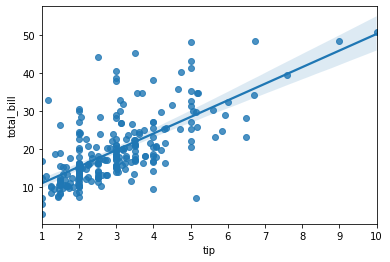

In [17]:
sns.regplot(x, y, df)

In [18]:
# compute residuals
df['residual'] = df['yhat'] - y
df['residual_baseline'] = df['yhat_baseline'] - y
df.head()

,total_bill,tip,sex,smoker,day,time,size,yhat_baseline,yhat,residual,residual_baseline
1,16.99,1.01,Female,No,Sun,Dinner,2,19.785943,11.141475,-5.848525,2.795943
2,10.34,1.66,Male,No,Sun,Dinner,3,19.785943,13.967489,3.627489,9.445943
3,21.01,3.50,Male,No,Sun,Dinner,3,19.785943,21.967283,0.957283,-1.224057
4,23.68,3.31,Male,No,Sun,Dinner,2,19.785943,21.141218,-2.538782,-3.894057
5,24.59,3.61,Female,No,Sun,Dinner,4,19.785943,22.445532,-2.144468,-4.804057


<AxesSubplot:xlabel='residual', ylabel='residual_baseline'>

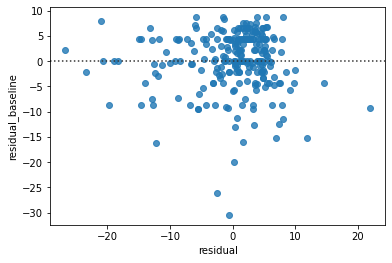

In [19]:
sns.residplot(x = df.residual, y = df.residual_baseline)

4. Calculate the sum of squared errors, explained sum of squares, total sum of squares, mean squared error, and root mean squared error for your model.

5. Calculate the sum of squared errors, mean squared error, and root mean squared error for the baseline model (i.e. a model that always predicts the average tip amount).

In [20]:
#mean squared error
MSE2 = mean_squared_error(y, df.yhat)
MSE2_baseline = mean_squared_error(y, df.yhat_baseline)

print("MSE", MSE2) 
print("MSE baseline" ,MSE2_baseline)

MSE 42.88823752111093
MSE baseline 78.92813148851114


In [21]:
#sum of squared errors
SSE2 = MSE2 * len(df)
SSE2_baseline = MSE2_baseline * len(df)

print("SSE", SSE2) 
print("SSE baseline" ,SSE2_baseline)

SSE 10464.729955151068
SSE baseline 19258.46408319672


In [22]:
#explained sum of square
ESS = sum((df.yhat - y.mean())**2)

#total sum of squares
TSS = ESS + SSE2
print("ESS = ", ESS)
print("TSS = ", TSS)

ESS =  8793.734128045637
TSS =  19258.464083196704


In [23]:
#root mean squared error
RMSE2 = mean_squared_error(y, df.yhat, squared = False)
RMSE2_baseline = mean_squared_error(y, df.yhat_baseline, squared=False)

print("RMSE", RMSE2) 
print("RMSE baseline" ,RMSE2_baseline)

RMSE 6.548911170653556
RMSE baseline 8.884150577771132


6. Write python code that compares the sum of squared errors for your model against the sum of squared errors for the baseline model and outputs whether or not your model performs better than the baseline model.

In [24]:
df_eval = pd.DataFrame(np.array(['SSE2','MSE2','RMSE2']), columns=['metric'])
df_baseline_eval = pd.DataFrame(np.array(['SSE2_baseline','MSE2_baseline','RMSE2_baseline']), columns=['metric'])

df_eval['model_error'] = np.array([SSE2, MSE2, RMSE2])
df_baseline_eval['model_error'] = np.array([SSE2_baseline, MSE2_baseline, RMSE2_baseline])

print(df_eval)
print(df_baseline_eval)

  metric   model_error
0   SSE2  10464.729955
1   MSE2     42.888238
2  RMSE2      6.548911
           metric   model_error
0   SSE2_baseline  19258.464083
1   MSE2_baseline     78.928131
2  RMSE2_baseline      8.884151


In [25]:
df_eval['error_delta'] = df_eval.model_error - df_baseline_eval.model_error
df_eval

,metric,model_error,error_delta
0,SSE2,10464.729955,-8793.734128
1,MSE2,42.888238,-36.039894
2,RMSE2,6.548911,-2.335239


7. What is the amount of variance explained in your model?

In [26]:
# sklearn.metrics.explained_variance_score

evs = explained_variance_score(df.total_bill, df.yhat)
print('Explained Variance = ', round(evs,3))

Explained Variance =  0.457


8. Is your model better than the baseline model? -Yes. error numbers are less than model errors.

9. Create a file named evaluate.py that contains the following functions.

In [ ]:
#creates a residual plot
def get_baseline(df, x, y):
    df['yhat_baseline'] = y.mean()
    model = LinearRegression().fit(x, y)
    df['yhat'] = model.predict(x)
    return df

#gets residuals with a get_baseline True or False
#gets residuals
def get_residuals(df, y):
    df['residual'] = df['yhat'] - y
    df['residual_baseline'] = df['yhat_baseline'] - y
    return df

#creates a residual plot
def plot_residual(df, x, y):
    sns.residplot(x, y)
    plt.show()

#returns regression errors
def regression_errors(df, y, yhat):
    MSE2 = mean_squared_error(y, yhat)
    SSE2 = MSE2 * len(df)
    ESS = sum((yhat - y.mean())**2)
    TSS = ESS + SSE2
    RMSE2 = mean_squared_error(y, yhat, squared = False)
    return (MSE2, SSE2, ESS, TSS, RMSE2)

#computes the SSE, MSE, and RMSE for the baseline model
def baseline_mean_errors(df, y, yhat_baseline):
    MSE2_baseline = mean_squared_error(y, yhat_baseline)
    SSE2_baseline = MSE2_baseline * len(df)
    RMSE2_baseline = mean_squared_error(y, yhat_baseline, squared=False)
    return MSE2_baseline, SSE2_baseline, RMSE2_baseline

#returns true if your model performs better than the baseline, otherwise false
def better_than_baseline(regression_errors = True, baseline_mean_errors = True):
    if regression_errors - baseline_mean_errors <  regression_errors:
        print('The model is better then the baseline.')
    else:
        print('The model is not better then the baseline.')

10. Load the mpg dataset and fit a model that predicts highway mileage based on engine displacement. Take a look at all the regression evaluation metrics, and determine whether this model is better than the baseline model. Use the functions from your evaluate.py to help accomplish this.

In [2]:
from pydataset import data
mpg = data('mpg')
mpg.head()

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class
1,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact
2,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact
3,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact
4,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact
5,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact


In [3]:
from evaluate import get_baseline
from evaluate import get_residuals
from evaluate import plot_residual
from evaluate import regression_errors
from evaluate import baseline_mean_errors
from evaluate import better_than_baseline

In [4]:
df = mpg
x = mpg[['hwy']]
y = mpg['displ']

In [5]:
get_baseline(df, x, y)

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class,yhat_baseline,yhat
1,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact,3.471795,2.547747
2,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact,3.471795,2.547747
3,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact,3.471795,2.215345
4,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact,3.471795,2.381546
5,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact,3.471795,3.046349
...,...,...,...,...,...,...,...,...,...,...,...,...,...
230,volkswagen,passat,2.0,2008,4,auto(s6),f,19,28,p,midsize,3.471795,2.713948
231,volkswagen,passat,2.0,2008,4,manual(m6),f,21,29,p,midsize,3.471795,2.547747
232,volkswagen,passat,2.8,1999,6,auto(l5),f,16,26,p,midsize,3.471795,3.046349
233,volkswagen,passat,2.8,1999,6,manual(m5),f,18,26,p,midsize,3.471795,3.046349


In [6]:
get_residuals(df, y)

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class,yhat_baseline,yhat,residual,residual_baseline
1,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact,3.471795,2.547747,0.747747,1.671795
2,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact,3.471795,2.547747,0.747747,1.671795
3,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact,3.471795,2.215345,0.215345,1.471795
4,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact,3.471795,2.381546,0.381546,1.471795
5,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact,3.471795,3.046349,0.246349,0.671795
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
230,volkswagen,passat,2.0,2008,4,auto(s6),f,19,28,p,midsize,3.471795,2.713948,0.713948,1.471795
231,volkswagen,passat,2.0,2008,4,manual(m6),f,21,29,p,midsize,3.471795,2.547747,0.547747,1.471795
232,volkswagen,passat,2.8,1999,6,auto(l5),f,16,26,p,midsize,3.471795,3.046349,0.246349,0.671795
233,volkswagen,passat,2.8,1999,6,manual(m5),f,18,26,p,midsize,3.471795,3.046349,0.246349,0.671795


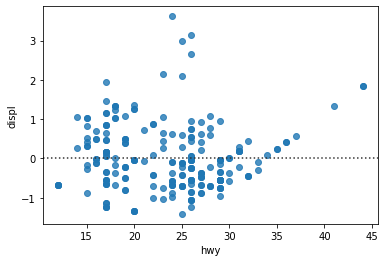

In [7]:
plot_residual(df, x, y)

In [8]:
regression_errors(df, y, df.yhat)

(0.686770874014408,
 160.70438451937147,
 228.20946163447454,
 388.913846153846,
 0.8287164014392426)

In [9]:
baseline_mean_errors(df, y, df.yhat_baseline)

(1.6620249835634453, 388.9138461538462, 1.2891954791898106)

In [10]:
better_than_baseline(regression_errors = True, baseline_mean_errors = True)

The model is better then the baseline.
